In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

2023-01-31 17:15:53.043489: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
model = C.Helper.load_unet('/raid/psych/CACTAS/unet_full_33_cases_weights.hdf5')

2023-01-31 17:15:54.492497: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-01-31 17:15:54.658432: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-31 17:15:54.658481: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-31 17:15:54.662466: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-01-31 17:15:54.662505: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-01-31 17:15:54.663625: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

In [4]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/'
images, labels = C.Helper.load(DATAPATH)

In [5]:
images, labels = C.Helper.shuffle(images, labels)

In [6]:
images, labels = C.Helper.normalize(images, labels)

In [7]:
X_train, X_val, y_train, y_val = C.Helper.split(images, labels, val_size=0.2)

In [8]:
y_pred = model.predict(X_val)

2023-01-31 17:16:55.925202: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-31 17:16:55.945221: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz
2023-01-31 17:16:56.147296: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-01-31 17:16:56.755723: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-01-31 17:16:57.430276: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-01-31 17:16:57.430301: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-01-31 17:16:57.430365: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modif

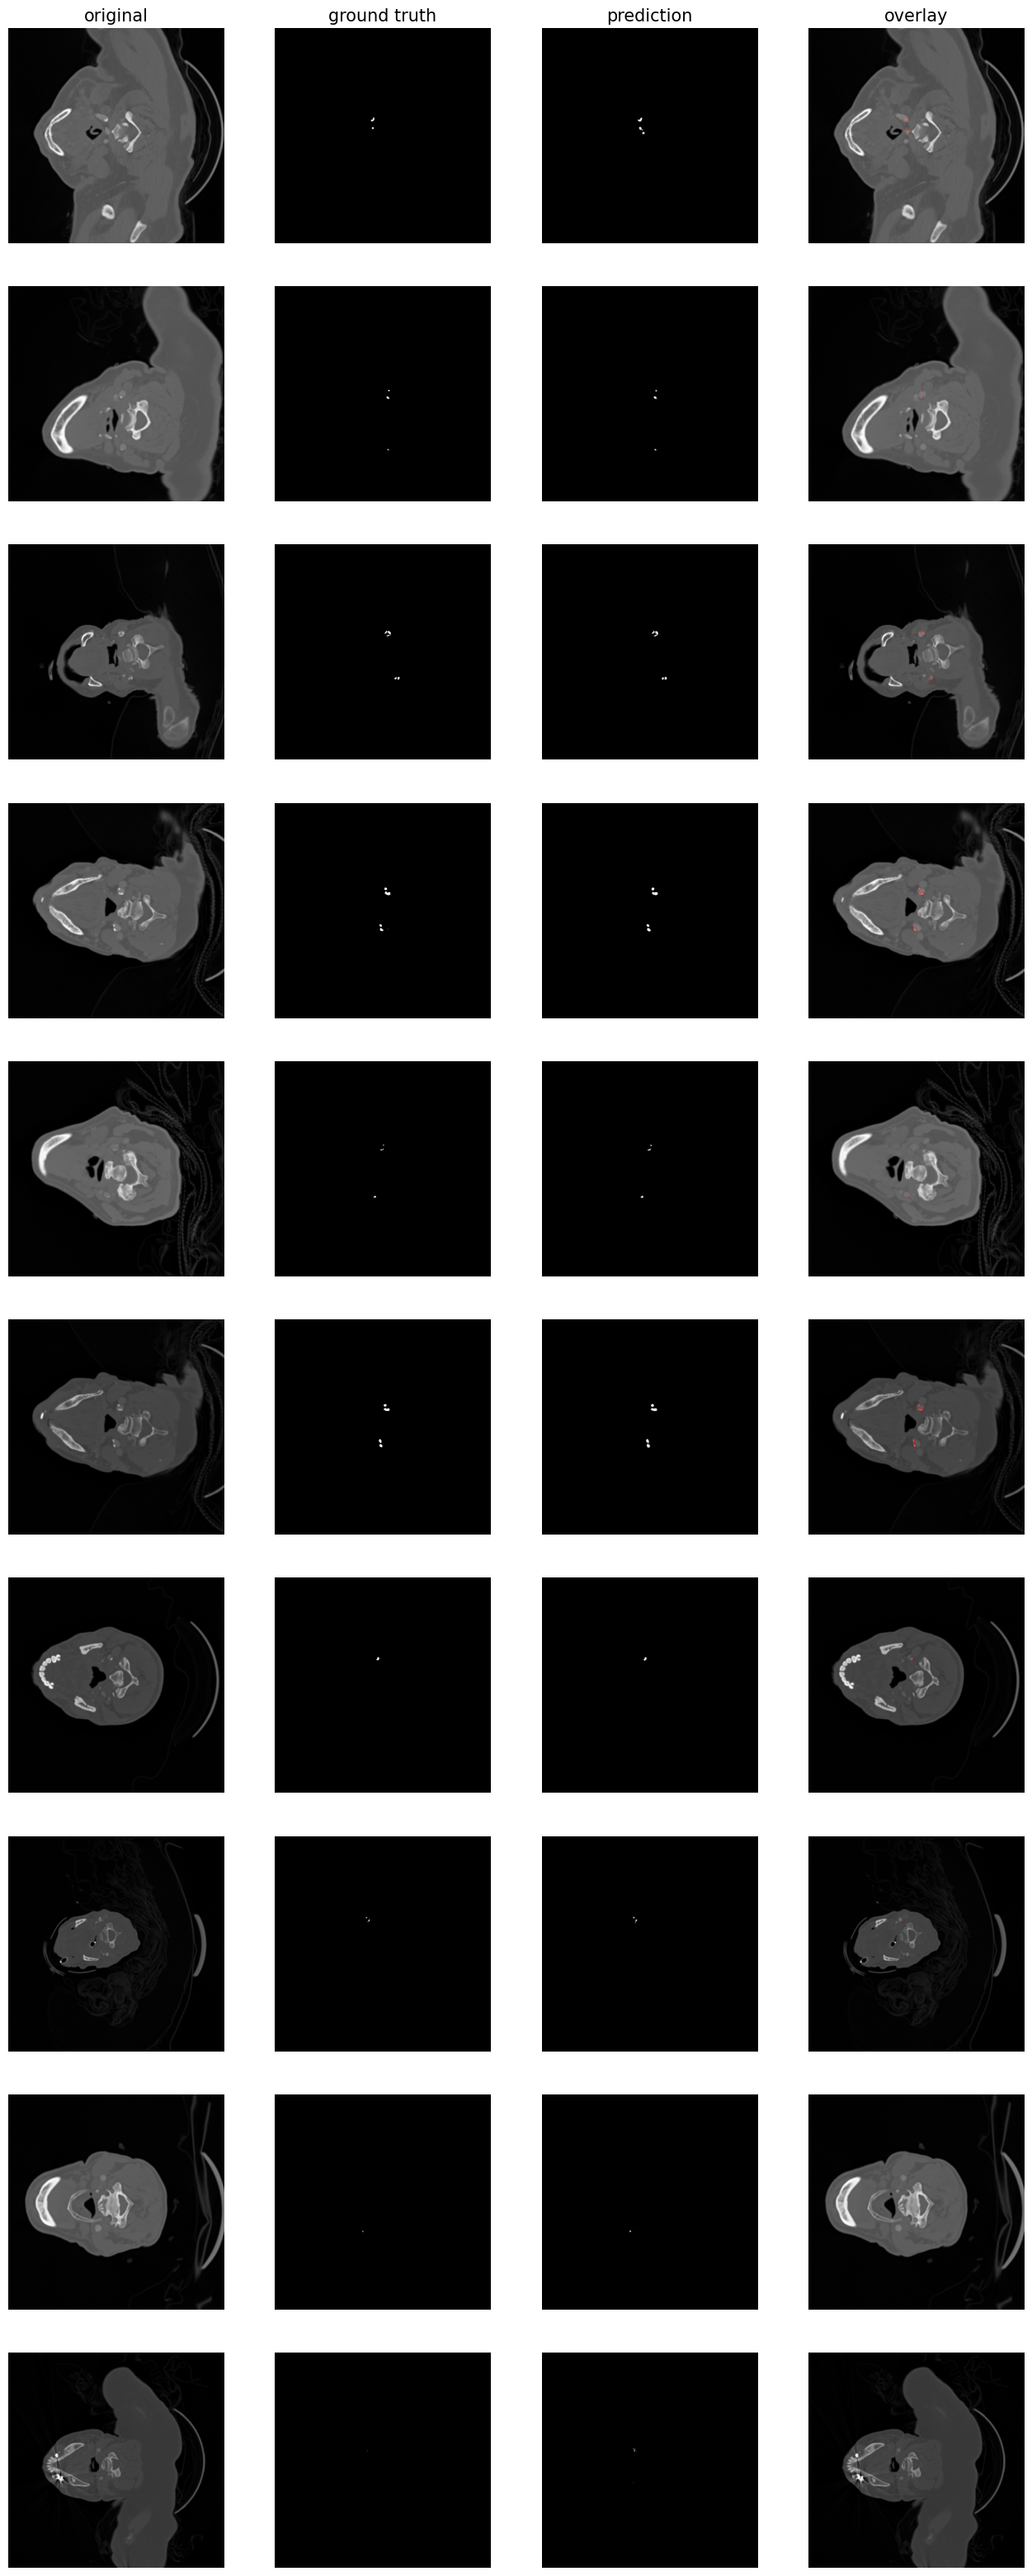

In [9]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_val, mask_imgs=y_val, pred_imgs=y_pred, nm_img_to_plot=10)

In [11]:
import mahotas as mh

In [12]:
X_val_c = []
y_val_c = []
y_pred_c = []

for i,z in enumerate(X_val):
    
    image = X_val[i]
    label = y_val[i]
    pred = y_pred[i]
    
    bbox = mh.bbox(label)
    incr=30
    X_val_c.append(image[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])
    y_val_c.append(label[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])
    y_pred_c.append(pred[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])


In [26]:
C.Util.view(X_val_c, y_val_c, vmin=0, vmax=1)

/home/daniel.haehn/miniconda3/envs/CTF25/lib/python3.9/site-packages/numpy/ma/core.py:1922: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(a, copy=copy, subok=True)


AttributeError: 'list' object has no attribute 'ndim'

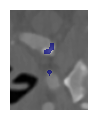

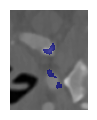

In [24]:
C.Util.view(X_val_c[0], y_val_c[0], vmin=0, vmax=1)
C.Util.view(X_val_c[0], C.Util.binarize(y_pred_c[0], threshold=.5), vmin=0, vmax=1)

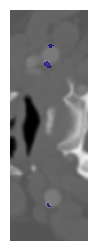

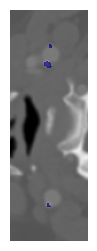

In [25]:
C.Util.view(X_val_c[1], y_val_c[1], vmin=0, vmax=1)
C.Util.view(X_val_c[1], C.Util.binarize(y_pred_c[1], threshold=.5), vmin=0, vmax=1)

In [33]:
maxX = 0
maxY = 0

for i,z in enumerate(X_val_c):
    
    maxX = max(z.shape[1], maxX)
    maxY = max(z.shape[0], maxY)
    
maxX=50
maxY=50
    
X_val_c_np = np.zeros((len(X_val_c), maxY, maxX,1), dtype=X_val.dtype)
y_val_c_np = np.zeros((len(y_val_c), maxY, maxX,1), dtype=y_val.dtype)
y_pred_c_np = np.zeros((len(y_pred_c), maxY, maxX,1), dtype=y_pred.dtype)

for i,z in enumerate(X_val_c):
    
    image = X_val_c[i]
    label = y_val_c[i]
    pred = y_pred_c[i]
    
    X_val_c_np[i][0:image.shape[0], 0:image.shape[1],:] = image[0:maxY,0:maxX]
    y_val_c_np[i][0:label.shape[0], 0:label.shape[1],:] = label[0:maxY,0:maxX]
    y_pred_c_np[i][0:pred.shape[0], 0:pred.shape[1],:] = pred[0:maxY,0:maxX]
    

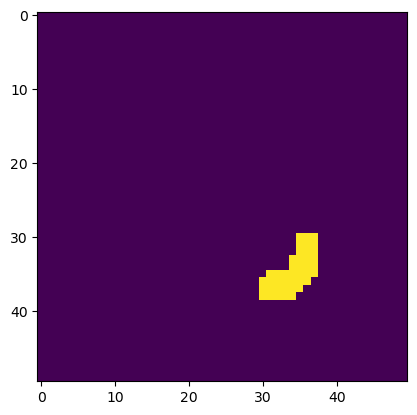

In [35]:
imshow(y_val_c_np[0])

In [39]:
X_val_c_np.shape

(101, 50, 50, 1)

In [44]:
X_val_c_np2 = np.swapaxes(X_val_c_np, 0, 2)
X_val_c_np2 = X_val_c_np2.reshape((50,50,101))

In [45]:
y_val_c_np2 = np.swapaxes(y_val_c_np, 0, 2)
y_val_c_np2 = y_val_c_np2.reshape((50,50,101))

In [46]:
y_pred_c_np2 = np.swapaxes(y_pred_c_np, 0, 2)
y_pred_c_np2 = y_pred_c_np2.reshape((50,50,101))

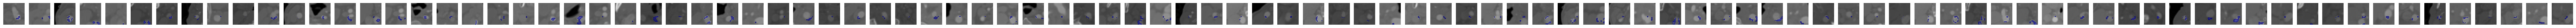

In [48]:
C.Util.view(X_val_c_np2, y_val_c_np2,vmin=0,vmax=1)

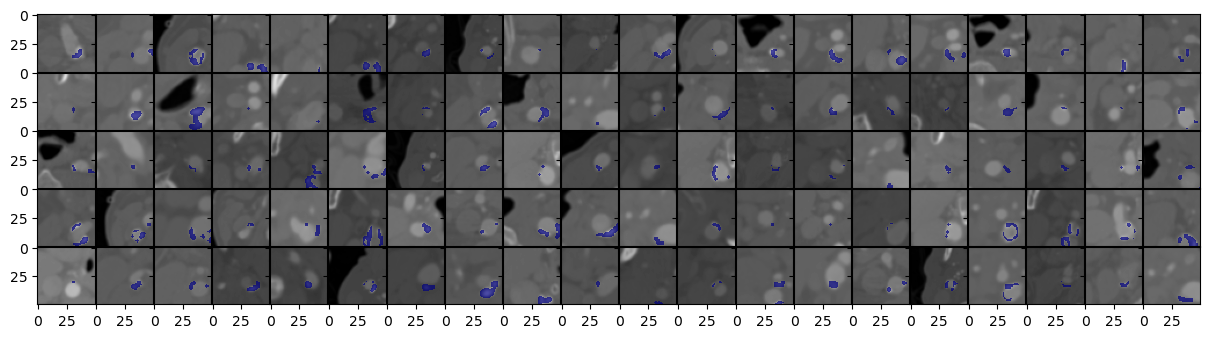

In [71]:
C.Util.view_grid(X_val_c_np2, y_val_c_np2)

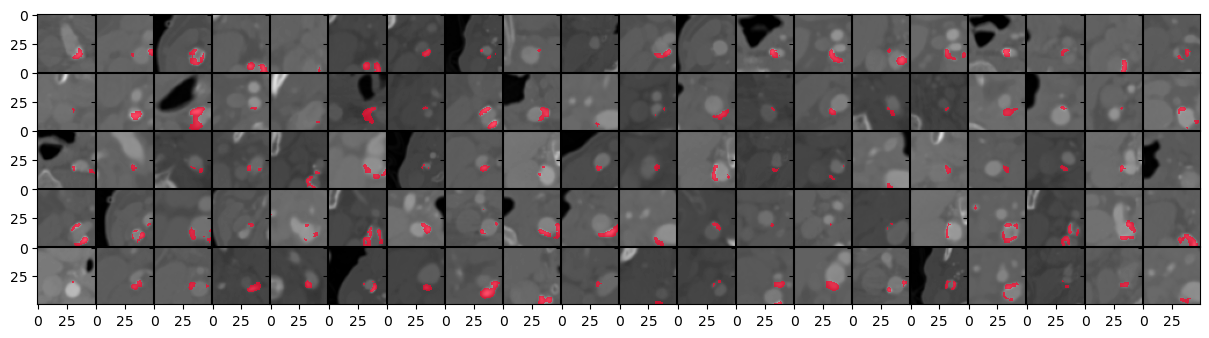

In [70]:
C.Util.view_grid(X_val_c_np2, C.Util.binarize(y_pred_c_np2, threshold=0.5))

TypeError: Invalid shape (101, 50, 50, 1) for image data

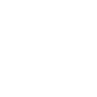

In [67]:
C.Util.view(X_val_c_np, y_val_c_np, vmin=0, vmax=1)

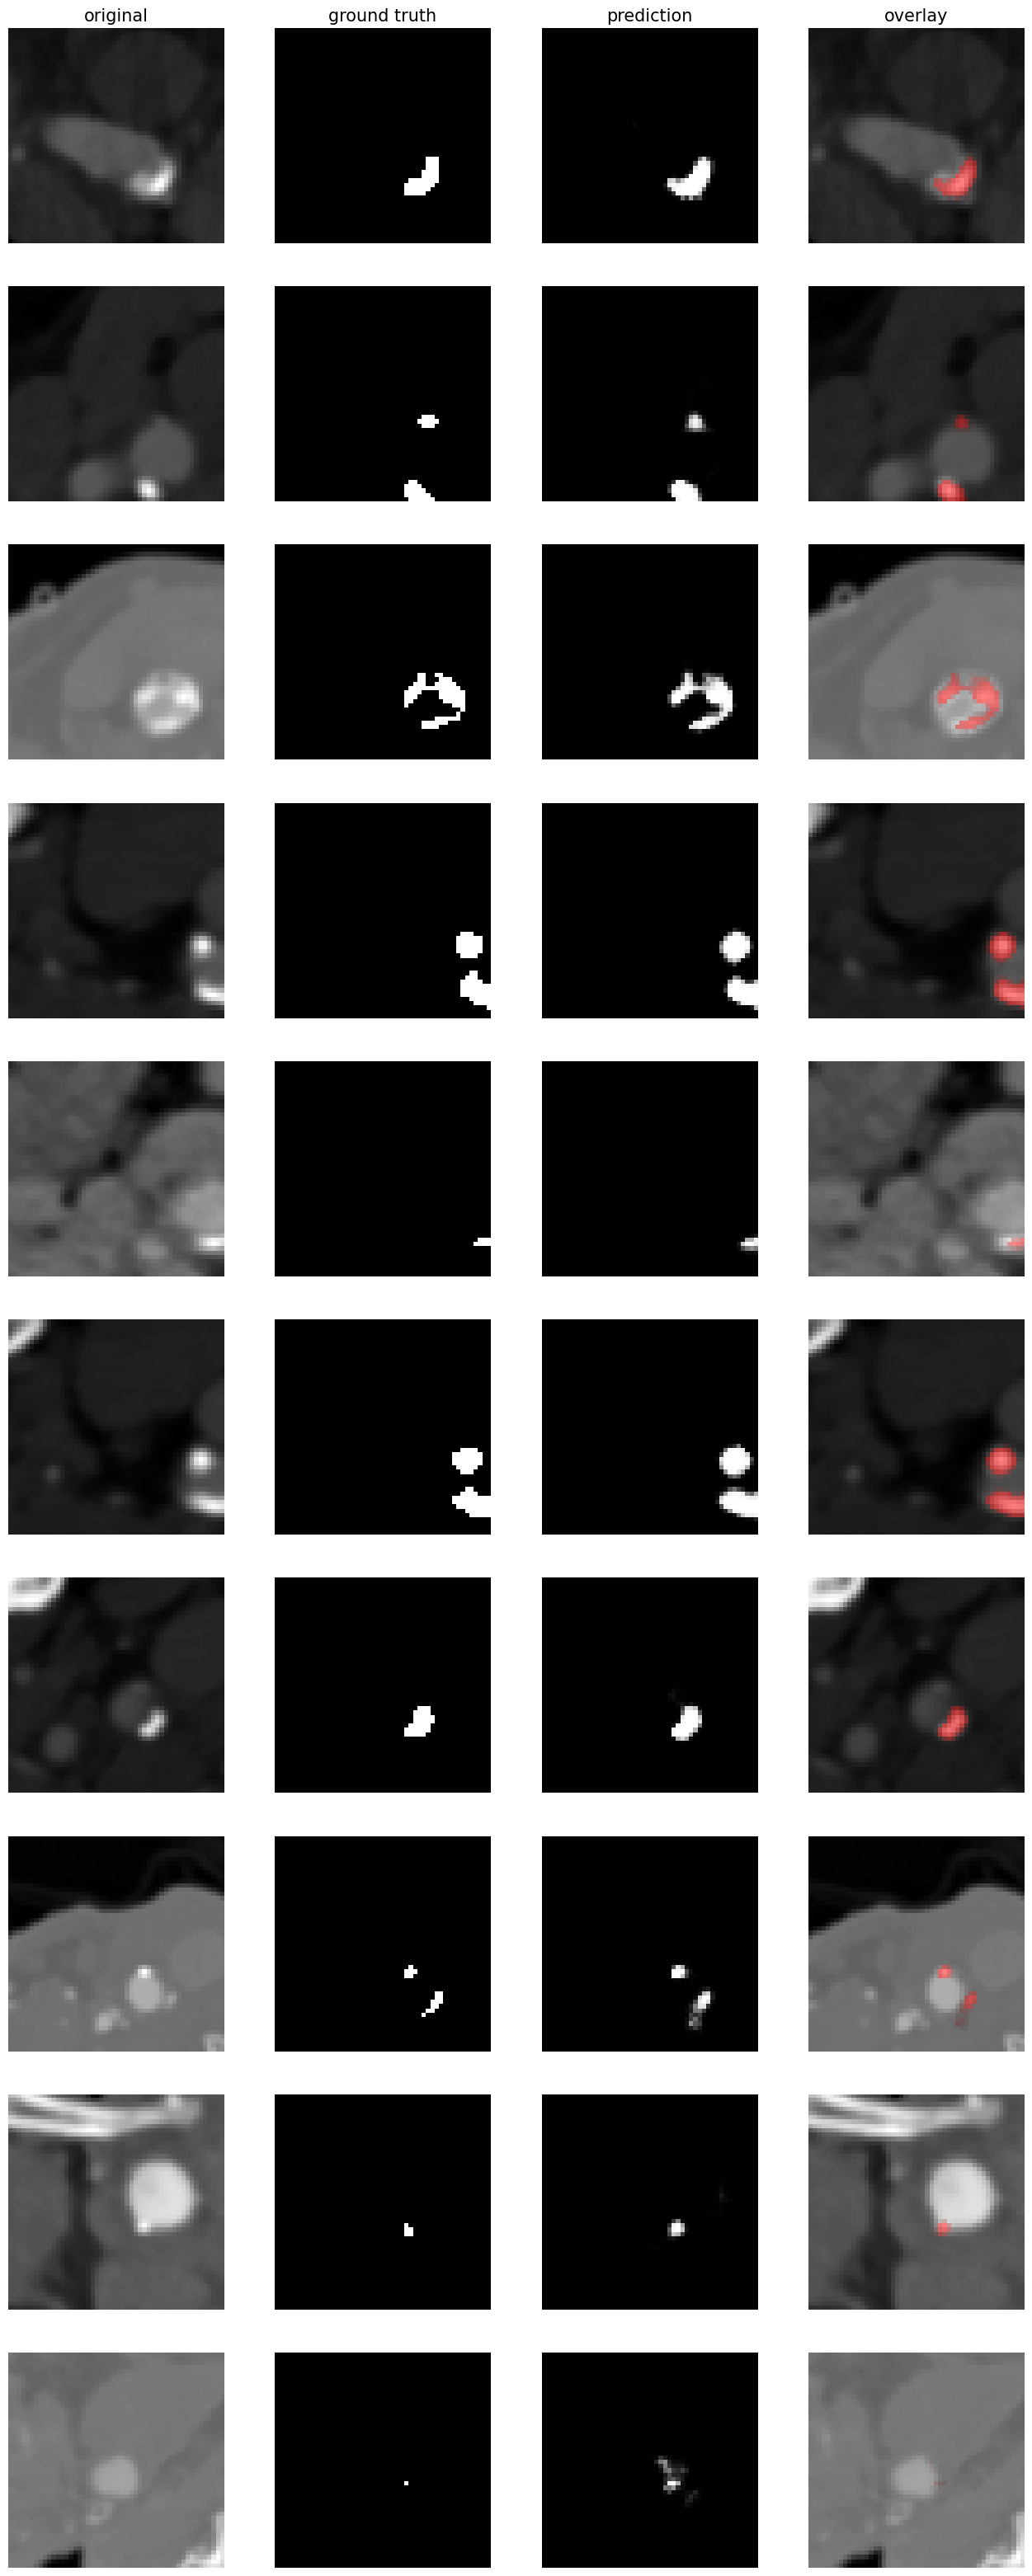

In [36]:
plot_imgs(org_imgs=X_val_c_np, mask_imgs=y_val_c_np, pred_imgs=y_pred_c_np)